In [61]:
import pandas as pd
import seaborn as sns
import datetime as dt
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap, HeatMapWithTime
import numpy as np
from collections import defaultdict, OrderedDict

In [3]:
df = pd.read_csv('NYPD_Shootings.csv', index_col=0, parse_dates=['OCCUR_DATE'])

In [4]:
df.sort_values('OCCUR_DATE').head(5)

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
INCIDENT_KEY,,,,,,,,,,,,,,,,,,
9953252,2006-01-01,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385,POINT (-73.94738485799998 40.807699163000045)
9953246,2006-01-01,5:51:00,BRONX,44,0.0,NONE,False,25-44,M,WHITE HISPANIC,18-24,M,WHITE HISPANIC,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)
139716503,2006-01-01,12:30:00,BROOKLYN,77,0.0,PVT HOUSE,True,NaN,NaN,NaN,25-44,M,BLACK,996442,184160,40.672153,-73.956050,POINT (-73.95604992899997 40.67215322100003)
9953245,2006-01-01,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,POINT (-73.89460587699995 40.85777050600007)
9953247,2006-01-01,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,POINT (-73.94570651699998 40.651013998000046)


In [36]:
df['seconds'] = pd.to_timedelta(df['OCCUR_TIME']).dt.total_seconds()
df['timestamp'] = df['OCCUR_DATE'] + pd.to_timedelta(df['OCCUR_TIME'])

In [38]:
df

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,...,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,seconds,timestamp,hour
INCIDENT_KEY,,,,,,,,,,,,,,,,,,,,,
201575314,2019-08-23,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,...,M,BLACK,1037451,193561,40.697805,-73.808141,POINT (-73.80814071699996 40.697805308000056),79800.0,2019-08-23 22:10:00,22
205748546,2019-11-27,15:54:00,BRONX,40,0.0,NaN,False,<18,M,BLACK,...,F,BLACK,1006789,237559,40.818700,-73.918571,POINT (-73.91857061799993 40.81869973000005),57240.0,2019-11-27 15:54:00,15
193118596,2019-02-02,19:40:00,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,...,M,BLACK HISPANIC,999347,227795,40.791916,-73.945480,POINT (-73.94547965999999 40.791916091000076),70800.0,2019-02-02 19:40:00,19
204192600,2019-10-24,00:52:00,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,...,F,BLACK,938149,171781,40.638064,-74.166108,POINT (-74.16610830199996 40.63806398200006),3120.0,2019-10-24 00:52:00,0
201483468,2019-08-22,18:03:00,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,...,M,BLACK,1008224,250621,40.854547,-73.913339,POINT (-73.91333944399999 40.85454734900003),64980.0,2019-08-22 18:03:00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216936948,2020-08-21,02:10:00,BRONX,48,0.0,MULTI DWELL - APT BUILD,True,NaN,NaN,NaN,...,M,BLACK HISPANIC,1007277,187698,40.681843,-73.916978,POINT (-73.91697825799997 40.681842679000056),7800.0,2020-08-21 02:10:00,2
214926175,2020-07-03,23:49:00,QUEENS,102,0.0,HOTEL/MOTEL,False,<18,M,BLACK,...,M,BLACK,1005993,241333,40.829060,-73.921434,POINT (-73.92143424399995 40.82906028200006),85740.0,2020-07-03 23:49:00,23
220870730,2020-11-21,08:05:00,BROOKLYN,60,0.0,NaN,True,NaN,NaN,NaN,...,M,WHITE,1046405,187113,40.680049,-73.775909,POINT (-73.77590919399995 40.680048726000045),29100.0,2020-11-21 08:05:00,8


In [6]:
display(df.dtypes)
display(df.columns)


OCCUR_DATE                 datetime64[ns]
OCCUR_TIME                         object
BORO                               object
PRECINCT                            int64
JURISDICTION_CODE                 float64
LOCATION_DESC                      object
STATISTICAL_MURDER_FLAG              bool
PERP_AGE_GROUP                     object
PERP_SEX                           object
PERP_RACE                          object
VIC_AGE_GROUP                      object
VIC_SEX                            object
VIC_RACE                           object
X_COORD_CD                         object
Y_COORD_CD                         object
Latitude                          float64
Longitude                         float64
Lon_Lat                            object
dtype: object

Index(['OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'PRECINCT', 'JURISDICTION_CODE',
       'LOCATION_DESC', 'STATISTICAL_MURDER_FLAG', 'PERP_AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE',
       'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'Lon_Lat'],
      dtype='object')

In [7]:
df['BORO'].unique()

array(['QUEENS', 'BRONX', 'MANHATTAN', 'STATEN ISLAND', 'BROOKLYN'],
      dtype=object)

In [8]:
df.shape

(23568, 18)

In [9]:
df.loc[df['STATISTICAL_MURDER_FLAG'] == True].shape

(4488, 18)

In [10]:
df.shape

(23568, 18)

In [11]:
vic_race_count = df['VIC_RACE'].value_counts().to_dict()
vic_race_count

{'BLACK': 16846,
 'WHITE HISPANIC': 3432,
 'BLACK HISPANIC': 2244,
 'WHITE': 615,
 'ASIAN / PACIFIC ISLANDER': 320,
 'UNKNOWN': 102,
 'AMERICAN INDIAN/ALASKAN NATIVE': 9}

In [12]:
perp_race_count = df['PERP_RACE'].value_counts().to_dict()
perp_race_count

{'BLACK': 9855,
 'WHITE HISPANIC': 1961,
 'UNKNOWN': 1869,
 'BLACK HISPANIC': 1081,
 'WHITE': 255,
 'ASIAN / PACIFIC ISLANDER': 120,
 'AMERICAN INDIAN/ALASKAN NATIVE': 2}

In [13]:
vic_sex_count = df['VIC_SEX'].value_counts().to_dict()
vic_sex_count

{'M': 21353, 'F': 2195, 'U': 20}

In [14]:
perp_sex_count = df['PERP_SEX'].value_counts().to_dict()
perp_sex_count

{'M': 13305, 'U': 1504, 'F': 334}

In [24]:
color_dict = {'BLACK': 'black',
 'WHITE HISPANIC': 'orange',
 'UNKNOWN': 'green',
 'BLACK HISPANIC': 'grey',
 'WHITE': 'white',
 'ASIAN / PACIFIC ISLANDER': 'pink',
 'AMERICAN INDIAN/ALASKAN NATIVE': 'brown'}

In [17]:
m = folium.Map(location=[40.807699, -73.947385])

In [25]:
df.dropna().apply(lambda row:folium.CircleMarker(location=[row['Latitude'], row['Longitude']], color=color_dict[row['PERP_RACE']] ,fill_color=color_dict[row['PERP_RACE']], popup=row['PERP_RACE'], radius=5).add_to(m), axis=1)

INCIDENT_KEY
204192600    <folium.vector_layers.CircleMarker object at 0...
193694863    <folium.vector_layers.CircleMarker object at 0...
201436772    <folium.vector_layers.CircleMarker object at 0...
201852654    <folium.vector_layers.CircleMarker object at 0...
193939359    <folium.vector_layers.CircleMarker object at 0...
                                   ...                        
221025253    <folium.vector_layers.CircleMarker object at 0...
210156781    <folium.vector_layers.CircleMarker object at 0...
215223441    <folium.vector_layers.CircleMarker object at 0...
214926175    <folium.vector_layers.CircleMarker object at 0...
220848244    <folium.vector_layers.CircleMarker object at 0...
Length: 6843, dtype: object

In [196]:
#m

In [29]:
df.dropna().apply(lambda row:folium.CircleMarker(location=[row['Latitude'], row['Longitude']], color=color_dict[row['PERP_RACE']] ,fill_color=color_dict[row['VIC_RACE']], popup=row['VIC_RACE'], radius=5).add_to(m), axis=1)

INCIDENT_KEY
204192600    <folium.vector_layers.CircleMarker object at 0...
193694863    <folium.vector_layers.CircleMarker object at 0...
201436772    <folium.vector_layers.CircleMarker object at 0...
201852654    <folium.vector_layers.CircleMarker object at 0...
193939359    <folium.vector_layers.CircleMarker object at 0...
                                   ...                        
221025253    <folium.vector_layers.CircleMarker object at 0...
210156781    <folium.vector_layers.CircleMarker object at 0...
215223441    <folium.vector_layers.CircleMarker object at 0...
214926175    <folium.vector_layers.CircleMarker object at 0...
220848244    <folium.vector_layers.CircleMarker object at 0...
Length: 6843, dtype: object

In [195]:
#m

In [122]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['dayname'] = df['timestamp'].dt.day_name()
df['quarter'] = df['timestamp'].dt.quarter
df['month'] = df['timestamp'].dt.month
df['month_name'] = df['timestamp'].dt.month_name()
df['year'] = df['timestamp'].dt.year
df['dayofyear'] = df['timestamp'].dt.dayofyear
df['dayofmonth'] = df['timestamp'].dt.day

In [123]:
df.head(1)

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,...,hour,weekday,dayofweek,quarter,month,year,dayofyear,dayofmonth,dayname,month_name
INCIDENT_KEY,,,,,,,,,,,,,,,,,,,,,
201575314,2019-08-23,22:10:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,...,22,4,4,3,8,2019,235,23,Friday,August


In [49]:
hour_plot = pd.DataFrame(df['hour'].value_counts())

In [58]:
weekday_plot = pd.DataFrame(df['dayname'].value_counts())

<AxesSubplot:ylabel='dayname'>

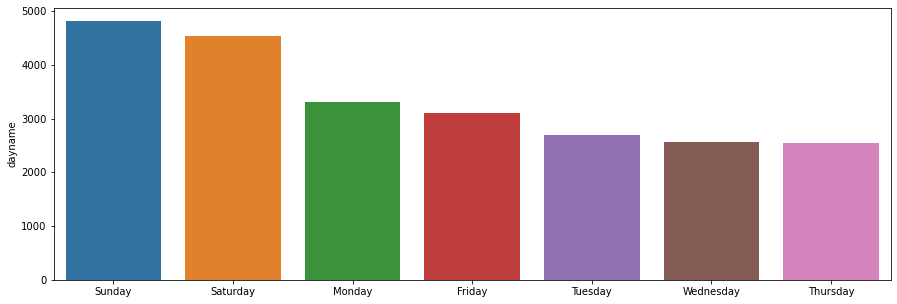

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x=weekday_plot.index, y=weekday_plot['dayname'])

<AxesSubplot:ylabel='hour'>

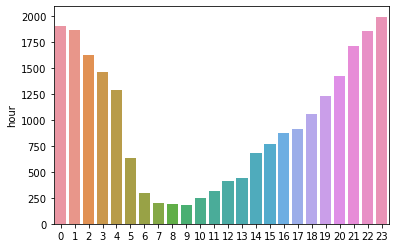

In [69]:
sns.barplot(x=hour_plot.index, y=hour_plot['hour'])

<AxesSubplot:>

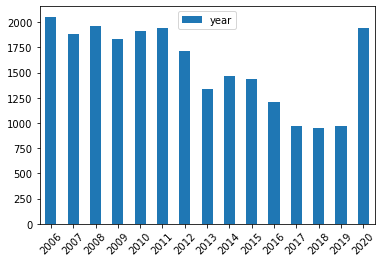

In [80]:
year_plot = pd.DataFrame(df['year'].value_counts())
year_plot.sort_index().plot(kind='bar', rot=45)

In [90]:
day_count = pd.DataFrame(df['dayofyear'].value_counts())

In [101]:
popular_days = day_count.sort_values('dayofyear', ascending=False)
popular_days

,dayofyear
186,160
1,135
187,134
243,124
181,121
...,...
38,25
46,24
61,23
54,21


In [105]:
day_count = df.groupby(['month', 'dayofmonth']).size().reset_index().rename(columns={0:'count'})

In [118]:
day_count.sort_values('count', ascending=False).head(30)

,month,dayofmonth,count,date
186,7,5,187,5:7
0,1,1,135,1:1
235,8,23,123,23:8
185,7,4,121,4:7
181,6,30,118,30:6
146,5,26,117,26:5
179,6,28,112,28:6
247,9,4,110,4:9
242,8,30,110,30:8
243,8,31,109,31:8


In [113]:
day_count['date'] = (day_count['dayofmonth'].astype(str) + ':' + day_count['month'].astype(str))
day_count

,month,dayofmonth,count,date
0,1,1,135,1:1
1,1,2,53,2:1
2,1,3,56,3:1
3,1,4,31,4:1
4,1,5,57,5:1
...,...,...,...,...
361,12,27,53,27:12
362,12,28,62,28:12
363,12,29,53,29:12
364,12,30,56,30:12


<AxesSubplot:xlabel='date'>

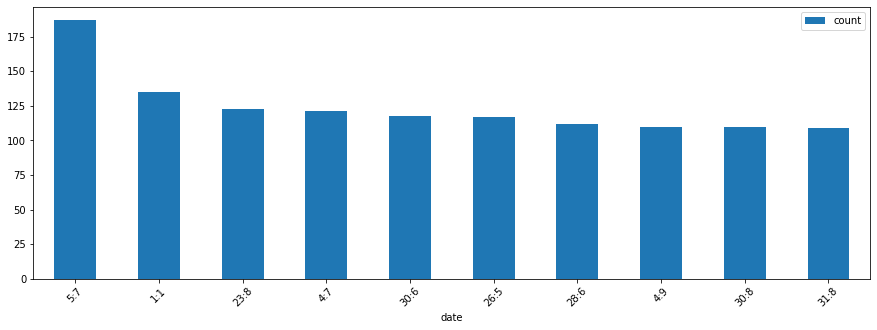

In [116]:
day_count.sort_values('count', ascending=False)[:10].plot(x='date', y='count', kind='bar', rot=45, figsize=(15,5))

<AxesSubplot:>

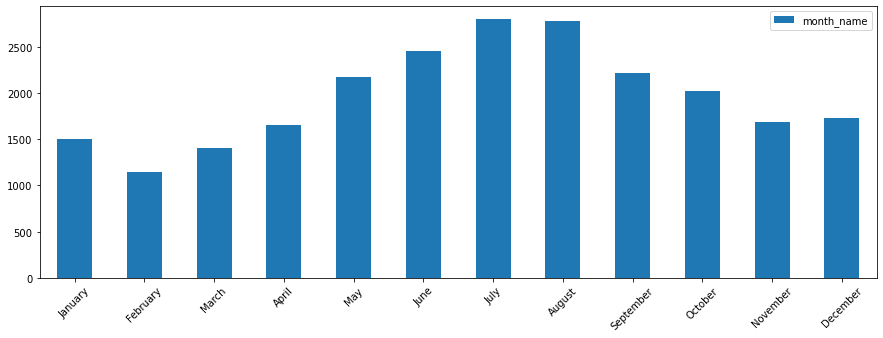

In [129]:
month_plot = pd.DataFrame(df['month_name'].value_counts())
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_plot.loc[month_order].plot(kind='bar', rot=45, figsize=(15,5))

In [190]:
m = folium.Map(location=[40.807699, -73.947385], zoom_start=10, tiles='stamentoner')

In [191]:
data_hour = defaultdict(list)

for r in df.itertuples():
    data_hour[r.hour].append([r.Latitude, r.Longitude])

data_hour = OrderedDict(sorted(data_hour.items(), key=lambda t: t[0]))

In [192]:
hm = HeatMapWithTime(data=list(data_hour.values()),
                     index=list(data_hour.keys()), 
                     radius=10,
                     auto_play=True,
                     max_opacity=0.3)

hm.add_to(m)

In [194]:
#m